In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df_clean = df.copy()

## Data Wrangling

In [4]:
print(df.shape)
print(df.dtypes)
print(df.head())

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id  

## ASSESS
    1. start_time and end_time are object
    2. duration are in seconds which is defficult to evaluate
    3. member_birth_year contains one that is 1886
    4. longitude and latitude are difficult to interpret
    5. start_time and end_time contain both date and hours. 

## Clean
    1.start_time and end_time are changed to datetime
    2.change duration to minutes
    3.Change 1886 to 1986 as it might be a typo
    4.Distances are calculated based on longitude and latitude and the orginal columns of longitude and latitude are reomved.
    5.Seperate date and hours into two columns (start_date and start_hour, end_data and end_hour)

In [4]:
#1. start_time and end_time are changed to datetime
df_clean['start_time'] =  pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] =  pd.to_datetime(df_clean['end_time'])

In [5]:
#2.change duration to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean = df_clean.drop('duration_sec', axis =1)

In [6]:
#3. Change 1886 to 1986 as it might be a typo
df_clean.loc[df_clean.member_birth_year < 1900, 'member_birth_year'] = 1986.0

In [7]:
# 4.Distances are calculated based on longitude and latitude and the orginal columns of 
# longitude and latitude are reomved.
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df_clean['dist_km'] = haversine_np(df_clean.start_station_longitude, df_clean.start_station_latitude, \
                                df_clean.end_station_longitude, df_clean.end_station_latitude)

ref : https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

In [8]:
#the columns 'start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude' are removed
to_drop = ['start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude']
for i in to_drop:
    df_clean = df_clean.drop(i, axis = 1)

In [9]:
#Seperate date and time into two columns and remove the orginal time.
df_clean['start_date'] = df_clean['start_time'].dt.date
df_clean['start_hour'] = df_clean['start_time'].dt.time
df_clean['end_date'] = df_clean['end_time'].dt.date
df_clean['end_hour'] = df_clean['end_time'].dt.time

In [10]:
#convert the date to datetime
df_clean['start_date'] =  pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] =  pd.to_datetime(df_clean['end_date'])

In [12]:
df_clean.sample(10)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,dist_km,start_date,start_hour,end_date,end_hour
347467,2017-09-14 16:09:37.185,2017-09-14 16:42:28.270,16,Steuart St at Market St,62,Victoria Manalo Draves Park,2237,Subscriber,1994.0,Female,32.850000,2.099486,2017-09-14,16:09:37.185000,2017-09-14,16:42:28.270000
180009,2017-11-01 14:32:45.941,2017-11-01 14:46:40.677,158,Shattuck Ave at Telegraph Ave,247,Fulton St at Bancroft Way,289,Subscriber,1980.0,Male,13.900000,3.840802,2017-11-01,14:32:45.941000,2017-11-01,14:46:40.677000
56517,2017-12-09 13:07:22.752,2017-12-09 13:21:10.688,62,Victoria Manalo Draves Park,285,Webster St at O'Farrell St,3101,Subscriber,1995.0,Male,13.783333,2.263090,2017-12-09,13:07:22.752000,2017-12-09,13:21:10.688000
487465,2017-07-24 12:37:42.698,2017-07-24 13:01:05.805,8,The Embarcadero at Vallejo St,6,The Embarcadero at Sansome St,2353,Customer,NaN,NaN,23.383333,0.676379,2017-07-24,12:37:42.698000,2017-07-24,13:01:05.805000
7276,2017-12-27 16:05:37.838,2017-12-27 16:14:11.659,81,Berry St at 4th St,5,Powell St BART Station (Market St at 5th St),3669,Subscriber,1993.0,Male,8.550000,1.610597,2017-12-27,16:05:37.838000,2017-12-27,16:14:11.659000
484583,2017-07-25 18:11:15.508,2017-07-25 18:19:06.935,59,S Van Ness Ave at Market St,86,Market St at Dolores St,1974,Subscriber,1984.0,Female,7.850000,0.923481,2017-07-25,18:11:15.508000,2017-07-25,18:19:06.935000
513888,2017-07-05 18:36:11.451,2017-07-05 18:47:08.143,15,San Francisco Ferry Building (Harry Bridges Pl...,67,San Francisco Caltrain Station 2 (Townsend St...,624,Subscriber,1983.0,Male,10.933333,2.087145,2017-07-05,18:36:11.451000,2017-07-05,18:47:08.143000
408940,2017-08-25 15:36:36.511,2017-08-25 15:44:35.742,21,Montgomery St BART Station (Market St at 2nd St),36,Folsom St at 3rd St,256,Customer,NaN,NaN,7.983333,0.666192,2017-08-25,15:36:36.511000,2017-08-25,15:44:35.742000
260307,2017-10-09 18:22:16.617,2017-10-09 18:33:10.221,44,Civic Center/UN Plaza BART Station (Market St ...,85,Church St at Duboce Ave,161,Subscriber,1992.0,Male,10.883333,1.957587,2017-10-09,18:22:16.617000,2017-10-09,18:33:10.221000
149243,2017-11-09 19:01:12.699,2017-11-09 19:10:41.653,244,Shattuck Ave at Hearst Ave,240,Haste St at Telegraph Ave,3088,Subscriber,1984.0,Male,9.466667,1.217572,2017-11-09,19:01:12.699000,2017-11-09,19:10:41.653000


## Investigation Overview

In this investigation, I want to look at the data set of individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I'm especially interested in looking at when the bikes are borrowed and the distance and duration time that each bike are used. 

## The structure of the dataset
There are 519700 entries in the df_clean dataset with 14 features (start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, duration_min, dist_km, start_date, start_hour, end_date, end_hour).

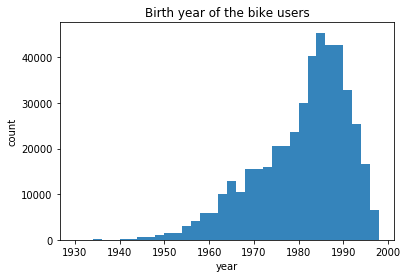

In [12]:
#the distribution of the birth year of the user is plotted with histgram
fig, ax = plt.subplots()
bins = np.arange(1930, 2000, 2)
ax.hist(df_clean.member_birth_year.dropna(), alpha=0.9, bins = bins)
plt.title('Birth year of the bike users')
plt.xlabel('year')
plt.ylabel('count');

In [14]:
#check birth year that is smaller than 1930
df_clean[df_clean.member_birth_year < 1930]
df_clean.member_birth_year.max()

1999.0

The distribution of the members birth year is right skewed. The majority of the members are born in the year between 1980 and 1990. Examination of the members that are born before 1930 shows a result of 477 entries. A closer look at these results show that most of the people are born in 1902. This is probably a typing error as by the year 2017 they are over 100. For this reason the members with a birth year lower than 1930 are not plotted.

The maximum birth year is 1999. This could be due to the age limit that those who are under 18 are not allowed to borrow any bikes or that those with a birth year of 1902 are actually a typo of 2002 although this is less likely.

## Distribution of the distance in km

The distribution of the distance in km is examined and plotted with the distance ranging from 0 to 8 km. The distance distribution has a long tail with the maximun distance being 68 km. Since the majority of the distance fall below 8 km those that are over 8 km are not plotted.

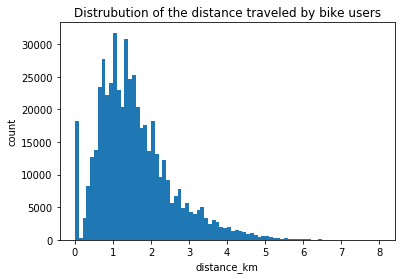

In [13]:
#the distribution of the distance traveled is plotted with histgram
bins = np.arange(0, 8+0.1, 0.1)
ticks = np.arange(0, 9, 1)
plt.hist(data=df_clean, x = 'dist_km', bins = bins)
plt.xticks(ticks, ticks)
plt.title('Distrubution of the distance traveled by bike users')
plt.xlabel('distance_km')
plt.ylabel('count');

In [16]:
#check the distance that is over 20 km
df_clean[df_clean.dist_km > 20]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,dist_km,start_date,start_hour,end_date,end_hour
145247,2017-11-10 14:02:06.731,2017-11-10 21:34:53.109,314,Santa Clara St at Almaden Blvd,40,Laguna St at McAllister St,1842,Customer,NaN,NaN,452.766667,68.143976,2017-11-10,14:02:06.731000,2017-11-10,21:34:53.109000
146554,2017-11-10 14:02:14.719,2017-11-10 16:41:55.054,314,Santa Clara St at Almaden Blvd,74,Laguna St at Hayes St,2118,Customer,NaN,NaN,159.666667,67.885626,2017-11-10,14:02:14.719000,2017-11-10,16:41:55.054000
185190,2017-10-31 07:57:18.251,2017-10-31 09:28:29.835,195,Bay Pl at Vernon St,312,San Jose Diridon Station,1210,Subscriber,1976.0,Male,91.183333,62.254571,2017-10-31,07:57:18.251000,2017-10-31,09:28:29.835000
372406,2017-09-07 07:07:21.130,2017-09-07 08:41:23.461,195,Bay Pl at Vernon St,312,San Jose Diridon Station,465,Subscriber,1976.0,Male,94.033333,62.254571,2017-09-07,07:07:21.130000,2017-09-07,08:41:23.461000


In [17]:
#check the distance that is 0 km
df_clean[df_clean.dist_km == 0]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,dist_km,start_date,start_hour,end_date,end_hour
2,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,NaN,NaN,762.800000,0.0,2017-12-31,22:45:48.411000,2018-01-01,11:28:36.883000
5,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),30,San Francisco Caltrain (Townsend St at 4th St),1487,Customer,NaN,NaN,153.766667,0.0,2017-12-31,22:51:00.918000,2018-01-01,01:24:47.166000
6,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer,1991.0,Female,75.116667,0.0,2017-12-31,23:49:28.422000,2018-01-01,01:04:35.619000
7,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,284,Yerba Buena Center for the Arts (Howard St at ...,1503,Customer,NaN,NaN,72.233333,0.0,2017-12-31,23:46:37.196000,2018-01-01,00:58:51.211000
8,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),3125,Customer,NaN,NaN,69.166667,0.0,2017-12-31,23:37:07.548000,2018-01-01,00:46:18.308000
9,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),2543,Customer,NaN,NaN,70.633333,0.0,2017-12-31,23:35:38.145000,2018-01-01,00:46:17.053000
49,2017-12-31 23:15:25.758,2017-12-31 23:28:28.372,6,The Embarcadero at Sansome St,6,The Embarcadero at Sansome St,1691,Customer,NaN,NaN,13.033333,0.0,2017-12-31,23:15:25.758000,2017-12-31,23:28:28.372000
50,2017-12-31 23:15:08.385,2017-12-31 23:28:28.204,6,The Embarcadero at Sansome St,6,The Embarcadero at Sansome St,533,Customer,NaN,NaN,13.316667,0.0,2017-12-31,23:15:08.385000,2017-12-31,23:28:28.204000
51,2017-12-31 23:17:57.867,2017-12-31 23:27:32.880,6,The Embarcadero at Sansome St,6,The Embarcadero at Sansome St,1568,Customer,NaN,NaN,9.583333,0.0,2017-12-31,23:17:57.867000,2017-12-31,23:27:32.880000
61,2017-12-31 22:23:06.172,2017-12-31 23:07:25.757,230,14th St at Mandela Pkwy,230,14th St at Mandela Pkwy,2335,Customer,NaN,NaN,44.316667,0.0,2017-12-31,22:23:06.172000,2017-12-31,23:07:25.757000


The distribution of the distance in km is examined and plotted with the distance ranging from 0 to 8 km. The distance distribution has a long tail with the maximun distance being 68 km. Since the majority of the distance fall below 8 km those that are over 8 km are not plotted. The diagram is right skewed. But no transfromation (log) is applied as the distance of 0 km is profound. A closer look at the distance abover 20 km we can find that the entry with index number of 185190 and 372406 documents a distance of 63 km but the duration is only around 90 min. This is not possible and therefore these two entries should be removed from the table.

On interesting thing to note from this plot is that the distance reach a maximum between 1 and 2 km. However a distance of 0 km is significantly high. 

## Distribution of duration in min


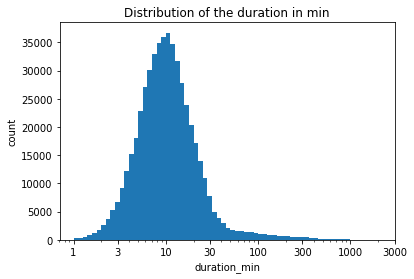

In [14]:
#distribution of the duration time the the bike is borrowed
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.hist(data=df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.title('Distribution of the duration in min')
plt.xlabel('duration_min')
plt.ylabel('count')
plt.xticks(ticks, ticks);

The distribution of the duration is plotted. As the duration has a long-tailed distribution, with a more significant number at the short distance end. When plotted on a log-scale, the duration distribution looks roughly normal, with the peak located around 10 min. 

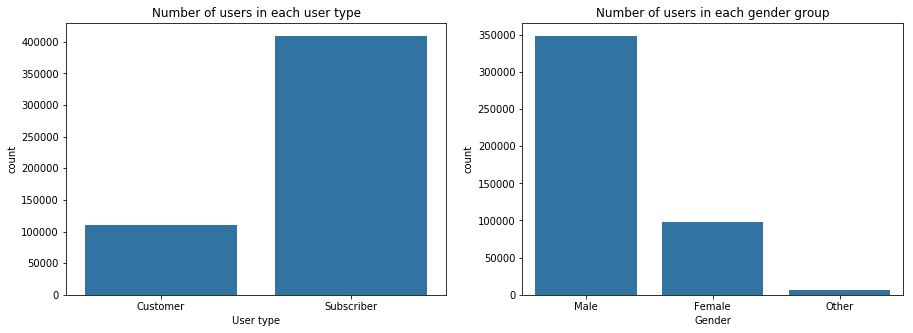

In [15]:
#the number of users are analyzed in customer/subscriber and gender group
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x = 'user_type', color = base_color)
plt.title('Number of users in each user type')
plt.xlabel('User type')
plt.ylabel('count');

plt.subplot(1, 2, 2)
sb.countplot(data=df_clean, x = 'member_gender', color = base_color)
plt.title('Number of users in each gender group')
plt.xlabel('Gender')
plt.ylabel('count');

Next the user_type and member_gender is examined with bar plot. From plot one count vs user_type we can see that the subscriber is a lot more that customer, and from the second plot count vs member_gender we can see that there are significantly more males than females. There is also one colume with gender being 'other'. This could be that the user does not want to identify him/her as male/female. For this reason this is not changed. 

## Distribution of duration in min

The distribution of the duration are examined seperately within customer and subscriber group. We can see that both these two groups are approximately normally distributed. However the distribution in duration in the customer group is more spread out than the subscribe group with the pear at around 20 min. For the subscriber the peak is at around 10min. In addition there are much more users that are subscribers than customers.

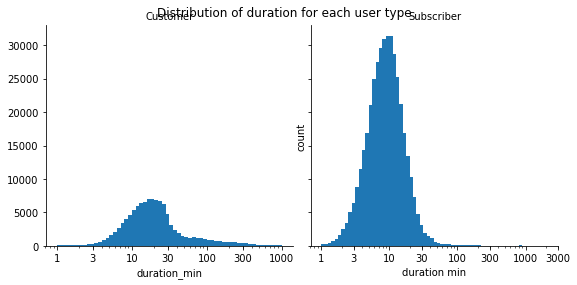

In [28]:
#a log transformation for duration_min is applied
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(plt.hist, "duration_min", bins = bins)
plt.xscale('log')
g.fig.suptitle('Distribution of duration for each user type')
g.set_titles('{col_name}')
plt.xlabel('duration min')
plt.ylabel('count')
plt.xticks(ticks, ticks);

Then the distribution of the duration are examined seperately within customer and subscriber group. We can see that both these two groups are approximately normally distributed. However the distribution in duration in the customer group is more spread out than the subscribe group with the pear at around 20 min. For the subscriber the peak is at around 10min. In addition there are much more users that are subscribers than customers.

## Distribution of duration in min

The distribution of the duration are examined seperately within gender group. Again both these groups are approximately normally distributed. The peak of duration for male is at around 10 min while for femak it's a little over 10 min.

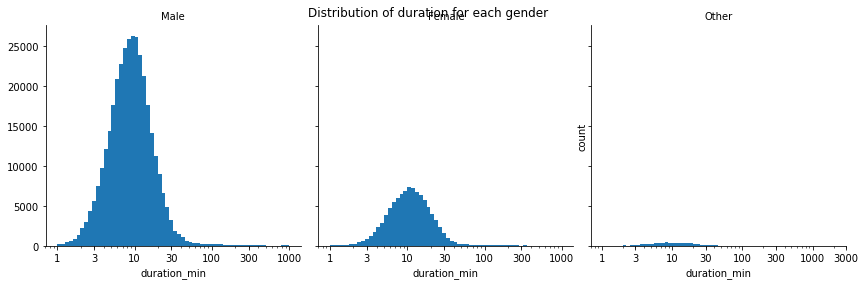

In [29]:
#the distribution of duration for each gender is plotted
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
g = sb.FacetGrid(data = df_clean, col = 'member_gender', size = 4)
g.map(plt.hist, "duration_min", bins = bins)
g.set_titles('{col_name}')
g.fig.suptitle('Distribution of duration for each gender')
plt.xscale('log')
plt.xlabel('duration_min')
plt.ylabel('count')
plt.xticks(ticks, ticks);

The distribution of the duration are examined seperately within gender group. Again both these groups are approximately normally distributed. The peak of duration for male is at around 10 min while for femak it's a little over 10 min.

## The bikes borrowed in each month

From the month barplot it shows that the month between from June to December is documented in this dataset. The peak of people who borrow the bike is at October. The number of people that borrow the bike is low in June probably due to the lack of the record.

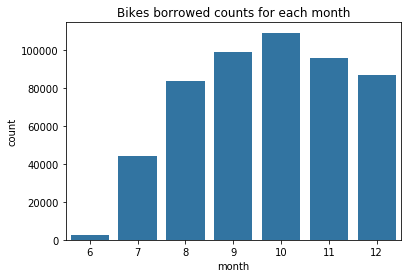

In [30]:
#the number of bikes borrowed for each month is plotted
sb.countplot(data=df_clean, x = df_clean['start_date'].dt.month, color = base_color)
plt.title('Bikes borrowed counts for each month')
plt.xlabel('month');

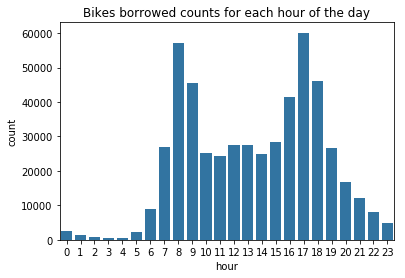

In [31]:
#get the start hours and plot the distribution
sb.countplot(data=df_clean, x = df_clean['start_time'].dt.hour, color = base_color)
plt.title('Bikes borrowed counts for each hour of the day')
plt.xlabel('hour');

## The bikes borrowed in each hour of the day

From the hour barplot we can see that the start hour and end hour distribution if binominal with the peak at 8:00 and 17:00. The number of bike borrowed is minimum from 0:00 to 5:00. From 6:00 the number significantly increase reaching maximun at 8:00. At 9:00 the number is still very high. Then the number drops and keeps at the same level from 10:00 to 15:00, after which time the number starts to rise again reaching maximum at 17:00. After that time hte number start to drop.

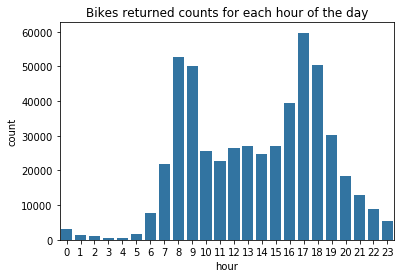

In [32]:
#get the end hours and plot the distribution
sb.countplot(data=df_clean, x = df_clean['end_time'].dt.hour, color = base_color)
plt.title('Bikes returned counts for each hour of the day')
plt.xlabel('hour');

The time (hour and month) when the customer borrowed the bike is analyzed with bar plot.

From the month barplot it shows that the month between from June to December is documented in this dataset. The peak of people who borrow the bike is at October. The number of people that borrow the bike is low in June probably due to the lack of the record.

From the hour barplot we can see that the start hour and end hour distribution if binominal with the peak at 8:00 and 17:00. The number of bike borrowed is minimum from 0:00 to 5:00. From 6:00 the number significantly increase reaching maximun at 8:00. At 9:00 the number is still very high. Then the number drops and keeps at the same level from 10:00 to 15:00, after which time the number starts to rise again reaching maximum at 17:00. After that time hte number start to drop. 

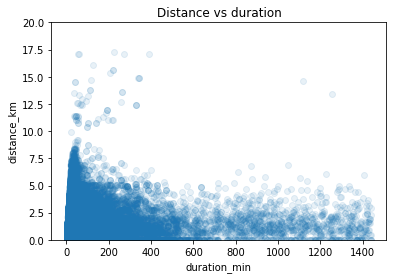

In [33]:
#relation of the distance and duration is plotted with a scatter plot
plt.scatter(data = df_clean, x = 'duration_min', y = 'dist_km', alpha = 0.1)
plt.ylim([0, 20])
plt.title('Distance vs duration')
plt.xlabel('duration_min')
plt.ylabel('distance_km');

The relation of distance and duration is examined with a scatter plot. We can see that majority of the points are located with a duration time ranging from 0 min to 200 min  and distance ranging from 0 km to 5 km. From this plot no apparent linear relationship between these two factors can be identified. It seems no matter how long the bike is borrowed the distance is usually no more than 7.5 km. And with more time the distance does not necessarily increase.

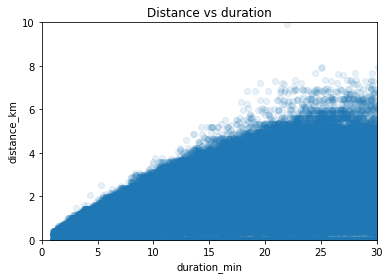

In [34]:
#relation of the distance and duration within a certain range is plotted with a scatter plot
plt.scatter(data = df_clean, x = 'duration_min', y = 'dist_km', alpha = 0.1)
plt.xlim([0, 30])
plt.ylim([0, 10])
plt.title('Distance vs duration')
plt.xlabel('duration_min')
plt.ylabel('distance_km');

A closer look at the duration time ranging from 0 to 30 min we can see that there is actually a postive relation between the distance and the duration. With increasing duration the distance is increasing.

## Relationship of distance traveled and the duration that bike is borrowed.

We can clearly see that in the middle of the plot where the color is lighter which corresponds to a more concentrated distribution of the points, there's a linear correlation between the distance and duration.

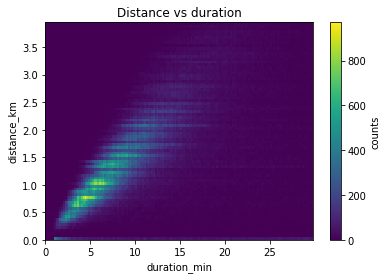

In [35]:
#the heatmap of the distance vs duration within a certain range is plotted 
bins_x = np.arange(0, 30, 0.2)
bins_y = np.arange(0, 4, 0.05)
plt.hist2d(data = df_clean, x ='duration_min', y = 'dist_km', bins = [bins_x,bins_y])
cbar = plt.colorbar()
cbar.set_label('counts')
plt.title('Distance vs duration')
plt.xlabel('duration_min')
plt.ylabel('distance_km');

In [37]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 30, 0.2)
    bins_y = np.arange(0, 4, 0.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

## Relationship of distance traveled and the duration that bike is borrowed.

Then the relation of distance and duration are examined within the gender and user group.

The male and female plot has very simiar features. A linear relationship between distance and duraion can be indentified from both plots. 

The customer and subscriber group is more interesting. We can see in the subscriber group, an intense color is at the middle of the plot showing that for most of the data points there's positive linear correlation between the distance and duration. However, looking at the customer group, such a relationship is less profound. Although we can still see that there's a positive relationship between the distance and duration, the linearity is not as apparent as the subscriber group. Another thing to note is that there's an intense distribution of the points with distance being 0 km. 

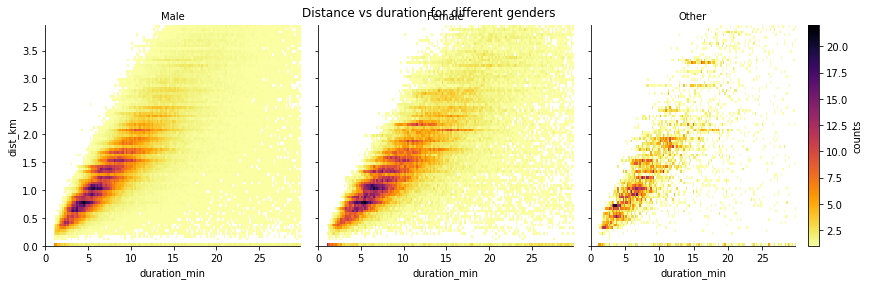

In [39]:
#the heatmap of the distance vs duration within a certain range  in different gender group is plotted 
g = sb.FacetGrid(data = df_clean, col = 'member_gender', size = 4)
g.map(hist2dgrid, 'duration_min', 'dist_km', color = 'inferno_r', bins = [bins_x,bins_y])
cbar = plt.colorbar()
cbar.set_label('counts')
g.fig.suptitle('Distance vs duration for different genders')
g.set_titles('{col_name}');

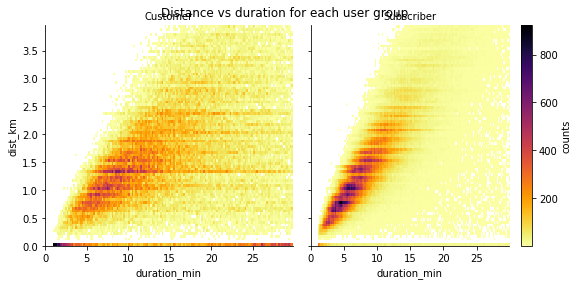

In [40]:
#the heatmap of the distance vs duration within a certain range  in different user group is plotted 
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(hist2dgrid, 'duration_min', 'dist_km', color = 'inferno_r', bins = [bins_x,bins_y])
cbar = plt.colorbar()
cbar.set_label('counts')
g.fig.suptitle('Distance vs duration for each user group')
g.set_titles('{col_name}');